In [71]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [72]:
# Load the data
raw = pd.read_csv("cardio_train.csv",sep = ";")
raw

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [73]:
####################################### CLEAN #########################

# Drop the ID
data = raw.drop(columns = "id")

# Convert age in days into year
data["age"] = round(data["age"]/365)
data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,53.0,2,168,76.0,120,80,1,1,1,0,1,0
69996,62.0,1,158,126.0,140,90,2,2,0,0,1,1
69997,52.0,2,183,105.0,180,90,3,1,0,1,0,1
69998,61.0,1,163,72.0,135,80,1,2,0,0,0,1


<AxesSubplot:xlabel='ap_lo'>

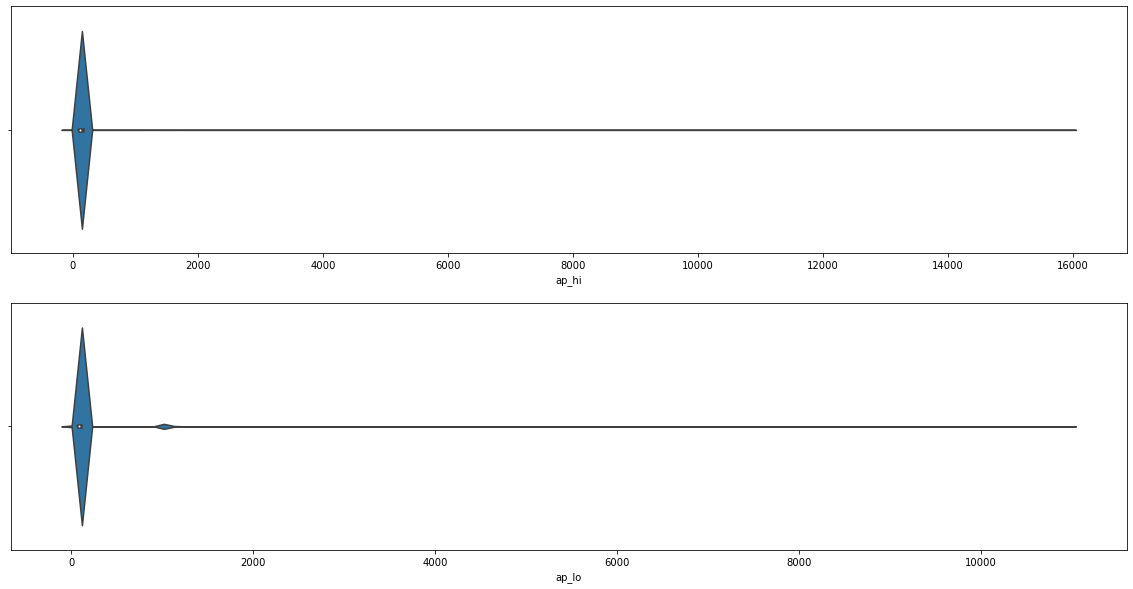

In [74]:
# Show ap_hi and ap_lo
fig,axes = plt.subplots(nrows = 2, figsize = (20,10))
sb.violinplot(x = data["ap_hi"],orient = "h", ax = axes[0])
sb.violinplot(x = data["ap_lo"], orient = "h", ax = axes[1])

In [75]:
ap_hi = data["ap_hi"]
ap_lo = data["ap_lo"]

## It looks like there are alot of outlier for ap_lo and ap_hi
## They should be systolic and diastolic blood pressure
## 140 mm Hg is already considered high blood pressure and values above 200 shouldn't be humanly possible as it will cause blood vessel to rupture
## We can rule out the values because of the irregularities

print("The number of values of ap_hi that are above 200 mmHg")
display(data["ap_hi"].loc[ap_hi > 200].count())
print("The number of values of ap_lo that are above 200 mmHg")
display(data["ap_lo"].loc[ap_lo > 200].count())



## 60 mm Hg is considered low blood pressure. And a change of 20 mmHg can cause fainting and dizziness. Hence we can have a lower cut off point at 40 mm Hg because at that point, the person shouldn't be conscious to be examinated


print("The number of values of ap_hi that are below 40 mmHg")
display(data["ap_hi"].loc[ap_hi < 40].count())
print("The number of values of ap_lo that are below 40 mmHg")
display(data["ap_lo"].loc[ap_lo < 40].count())

The number of values of ap_hi that are above 200 mmHg


100

The number of values of ap_lo that are above 200 mmHg


953

The number of values of ap_hi that are below 40 mmHg


188

The number of values of ap_lo that are below 40 mmHg


59

<AxesSubplot:xlabel='ap_lo'>

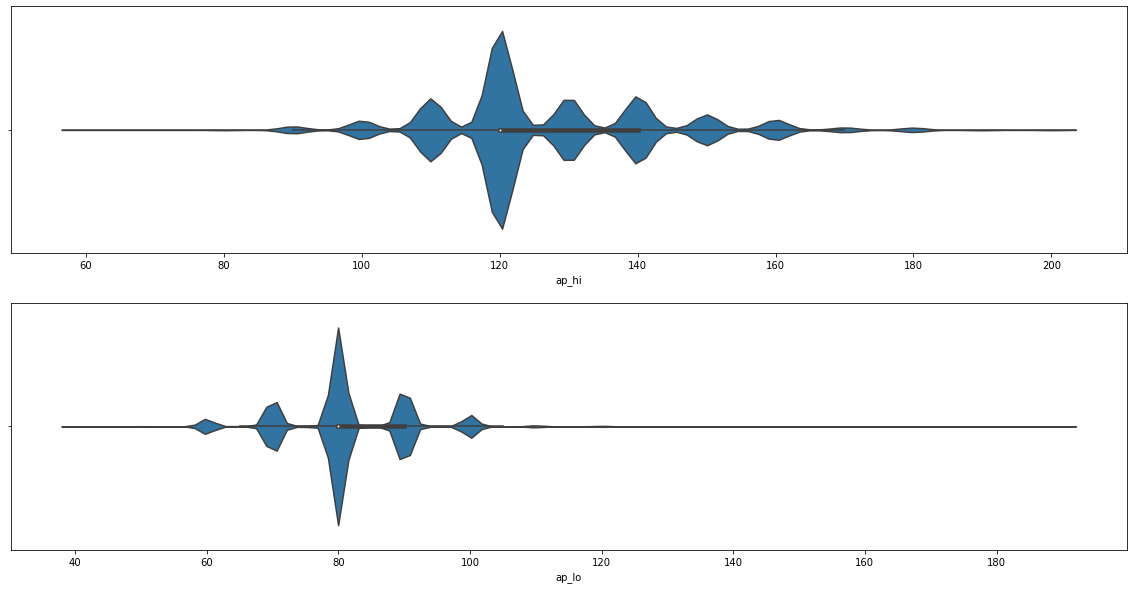

In [76]:

## We will drop these numbers larger than 200
data = data.drop(data.loc[ap_hi > 200].index)
data = data.drop(data.loc[ap_lo > 200].index)

## Drop the number lower than 
data = data.drop(data.loc[ap_hi < 40].index)
data = data.drop(data.loc[ap_lo < 40].index)

# Show ap_hi and ap_lo
fig,axes = plt.subplots(nrows = 2, figsize = (20,10))
sb.violinplot(x = data["ap_hi"],orient = "h", ax = axes[0])
sb.violinplot(x = data["ap_lo"], orient = "h", ax = axes[1])

In [77]:
# 150 seemed to be quite high for ap_lo diastolic blood pressure (when heart is at rest)
# Let's check these data points

ap_lo150 = data.loc[data["ap_lo"]>150]
ap_lo150

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
4781,52.0,1,158,74.0,200,170,1,1,0,0,1,1
4941,56.0,1,160,69.0,80,170,1,1,0,0,1,1
9817,44.0,1,152,53.0,90,160,1,1,0,1,1,1
15524,61.0,1,152,65.0,95,170,1,1,0,1,1,1
19925,63.0,1,160,88.0,150,180,1,1,0,0,0,1
26419,42.0,1,176,81.0,110,170,1,2,0,0,1,0
31233,61.0,1,165,73.0,95,170,1,3,0,0,1,1
37144,51.0,2,175,75.0,150,180,1,1,0,0,0,1
38022,60.0,1,161,84.0,196,182,2,2,0,0,1,1
43998,62.0,2,163,70.0,200,180,1,1,0,0,0,1


In [78]:
# Some data points have ap_lo > ap_hi. We will filter these as well
data = data.drop(data.loc[ap_lo > ap_hi].index)
data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,53.0,2,168,76.0,120,80,1,1,1,0,1,0
69996,62.0,1,158,126.0,140,90,2,2,0,0,1,1
69997,52.0,2,183,105.0,180,90,3,1,0,1,0,1
69998,61.0,1,163,72.0,135,80,1,2,0,0,0,1


In [79]:
## Columns
cat_columns = ["gender","cholesterol","gluc","smoke","alco","active","cardio"]
num_columns = ["age","height","weight","ap_hi","ap_lo"]

data[cat_columns] = data[cat_columns].astype("category")
data.dtypes

age             float64
gender         category
height            int64
weight          float64
ap_hi             int64
ap_lo             int64
cholesterol    category
gluc           category
smoke          category
alco           category
active         category
cardio         category
dtype: object

In [80]:
######################################## EXPLORATION ################

1    44709
2    23913
Name: gender, dtype: int64

1    51478
2     9285
3     7859
Name: cholesterol, dtype: int64

1    58353
3     5212
2     5057
Name: gluc, dtype: int64

0    62587
1     6035
Name: smoke, dtype: int64

0    64962
1     3660
Name: alco, dtype: int64

1    55127
0    13495
Name: active, dtype: int64

0    34690
1    33932
Name: cardio, dtype: int64

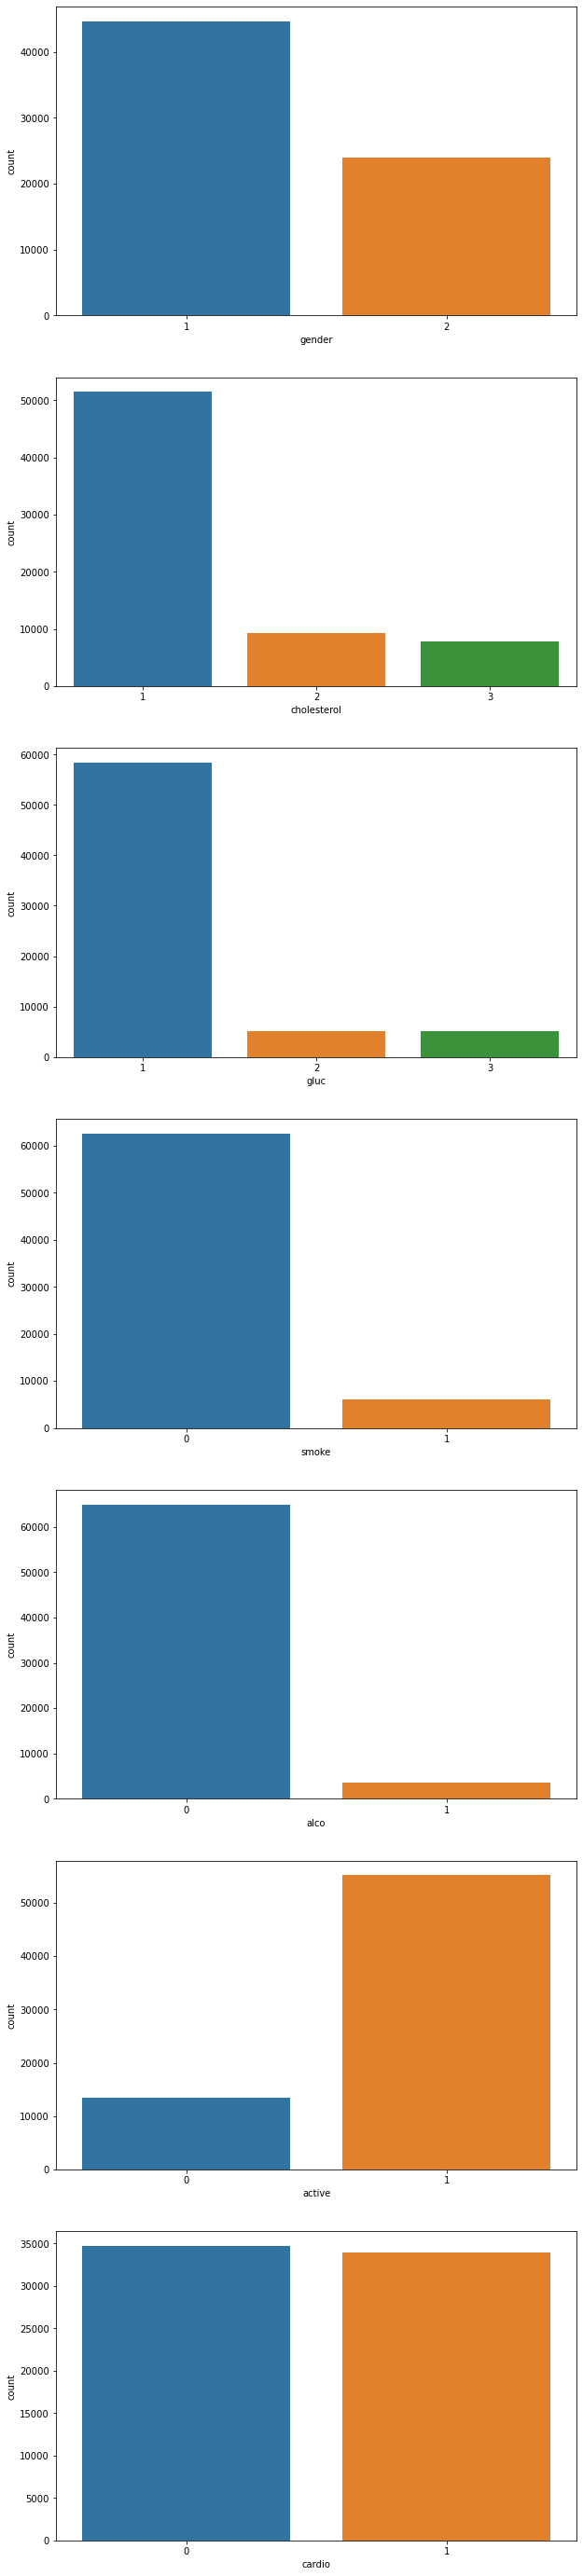

In [81]:
### Check for the ratio of the categorical variables
fix, axes = plt.subplots(nrows = len(cat_columns), figsize = (10,50))
count = 0
for cat in cat_columns:
	display(data[cat].value_counts())
	sb.countplot(x = data[cat], ax = axes[count])

	count +=1

In [82]:
# It seemed that in the dataset, the majority of people:
# 1) Have normal cholesterol and glucose level
# 2) Are active
# 3) Don't smoke or drink alcohol

# The target variable "Cardio" is balanced
# The ratio of gender 1 to 2 is 1.8:1

# We need to find out what is gender 1 and 2 so that we can build the application

<AxesSubplot:xlabel='smoke', ylabel='gender'>

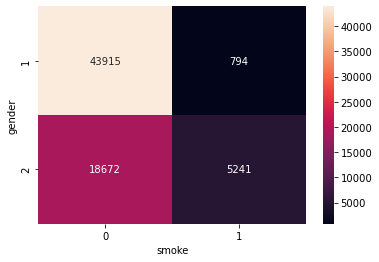

In [83]:
sb.heatmap(data.groupby(["gender","smoke"]).size().unstack(), annot = True, fmt = "0.0f")

In [84]:
# Gender 2 has fewer count but have higher number of smoker
# Using real life heuristics, we can assign that
# Gender 1 is female
# Gender 2 is male

<AxesSubplot:>

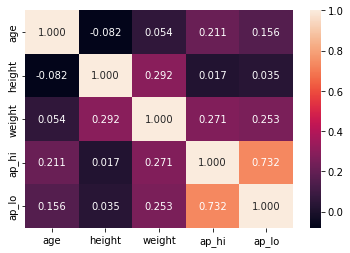

In [85]:
##### See the correlation between the numerical variables

sb.heatmap(data[num_columns].corr(), annot = True, fmt = "0.3f")

### It seemed like ap_hi and ap_lo have more correlation
### It is reasonable because a person with high blood pressure at rest (ap_lo, diastolic) will have high blood pressure when the heart is active (ap_hi, systolic), (ap_hi = ap_lo + blood pressure from heart pumping)

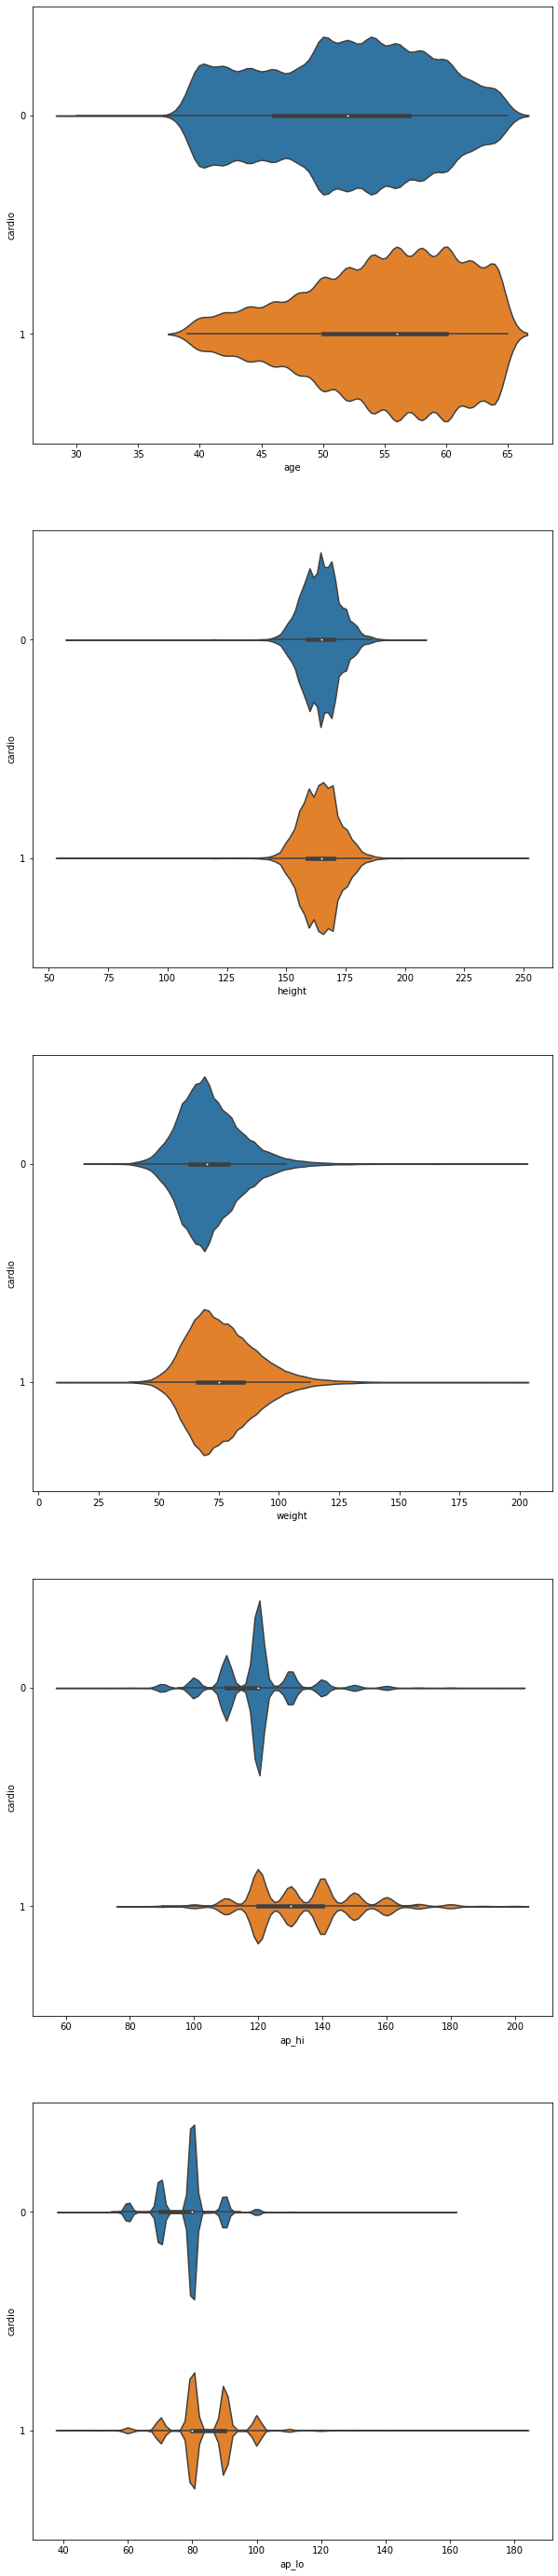

In [103]:
# See the distribution of the numeric variables between people with/without disease

fig, axes = plt.subplots(nrows = len(num_columns), figsize = (10,50))
count = 0
for num in num_columns:
	sb.violinplot(data = data, x = num, y = "cardio", ax = axes[count])
	count +=1 

In [89]:
# It seems that only age and disease might have correlation. Disease is distributed over older people more 

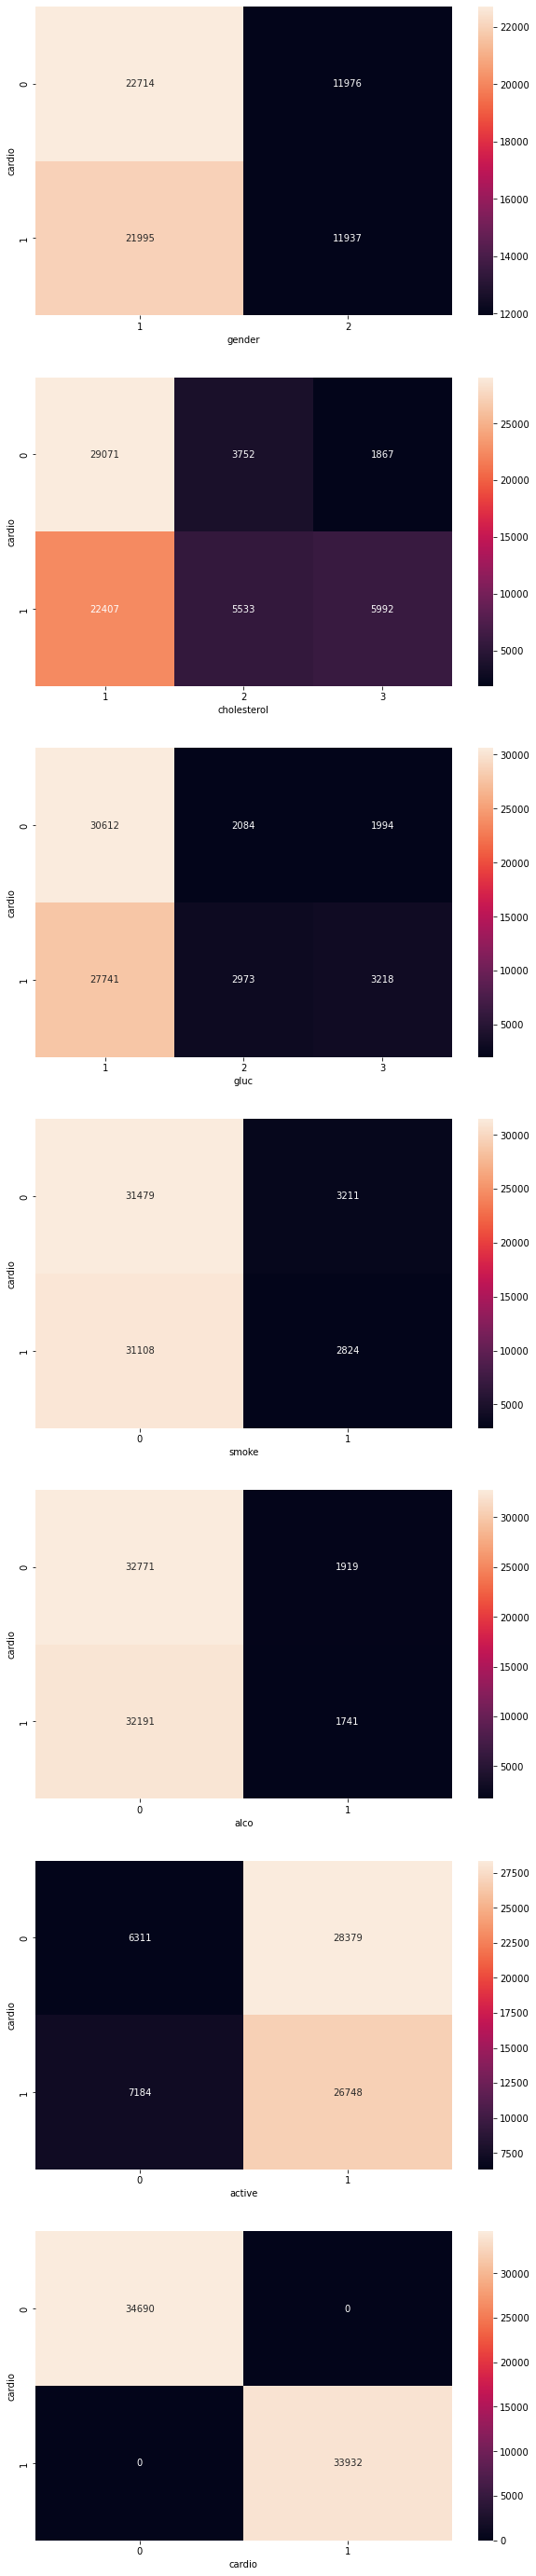

In [105]:
### Heatmap Correlation of the Categorical data

fig, axes = plt.subplots(nrows = len(cat_columns),figsize = (10,50))
count = 0
for cat in cat_columns:
	sb.heatmap(data.groupby(["cardio",cat]).size().unstack(), annot = True, fmt = "0.0f",ax = axes[count])
	count +=1

In [106]:
# For each gender, the ratio of people with to without disease is comparable
# Not considering the normal case, more people with above normal cholesterol and glucose have disease
# Among the people who smoke and drink, there are more people without disease
# More Non-active people have disease

In [88]:
data.to_csv("data.csv",index = False) ## Export cleaned data